<a href="https://colab.research.google.com/github/YunTaeHyeon/SmartBuildingBigDataAnalyze/blob/main/dataAnalyze/correlation_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import re
import csv
import gensim
from sklearn.preprocessing import normalize
from itertools import combinations

Mounted at /content/drive


# 코사인 유사도 0.9 이상만

In [2]:
# CSV 파일 불러오기
data = pd.read_csv('/content/drive/MyDrive/경진대회 DATA/train_data.csv', encoding='cp1252')

# 열 선택
selected_columns = data[['temp', 'humi', 'co2', 'dust_pm1', 'dust_pm_25', 'dust_pm_10', 'illuminance', 'voc', 'eco2', 'PIR']]

# 결측치가 있는 행 제거
data_without_na = selected_columns.dropna()

# 데이터 정규화
normalized_data = normalize(data_without_na.values, axis=0)

# 코사인 유사도 계산
cosine_similarities = {}

for col1, col2 in combinations(data_without_na.columns, 2):
    vector1 = normalized_data[:, data_without_na.columns.get_loc(col1)]
    vector2 = normalized_data[:, data_without_na.columns.get_loc(col2)]
    cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    cosine_similarities[(col1, col2)] = cosine_similarity

for (col1, col2), similarity in cosine_similarities.items():
    if similarity >= 0.9:
        print(f"코사인 유사도 {col1} , {col2}: {similarity}")

코사인 유사도 temp , humi: 0.9782043770661988
코사인 유사도 temp , co2: 0.913889930701971
코사인 유사도 humi , co2: 0.9043288176115872
코사인 유사도 dust_pm1 , dust_pm_25: 0.9961852546511202
코사인 유사도 dust_pm1 , dust_pm_10: 0.9682329690902972
코사인 유사도 dust_pm_25 , dust_pm_10: 0.9863037549889474


# PIR과 다른 모든 열들과의 유사도

In [3]:
# CSV 파일 불러오기
data_with_na = pd.read_csv('/content/drive/MyDrive/경진대회 DATA/train_data.csv', encoding='cp1252')

# 결측치가 있는 행 제거
data = data_with_na.dropna()

# 'PIR' 열 선택
pir_column = data['PIR']

# 다른 열들 선택
other_columns = data[['temp', 'humi', 'co2', 'dust_pm1', 'dust_pm_25', 'dust_pm_10', 'illuminance', 'voc', 'eco2']]

# 데이터 정규화
normalized_pir = normalize(pir_column.values.reshape(1, -1))
normalized_other = normalize(other_columns.values, axis=0)

# 코사인 유사도 계산
cosine_similarities = {}

for column_name, column_values in other_columns.items():
    vector = normalized_other[:, other_columns.columns.get_loc(column_name)]
    cosine_similarity = np.dot(normalized_pir, vector) / (np.linalg.norm(normalized_pir) * np.linalg.norm(vector))
    cosine_similarities[column_name] = cosine_similarity

# 결과 출력
for column_name, similarity in cosine_similarities.items():
    print(f"PIR과의 코사인 유사도 {column_name}: {similarity}") #쓰지 않아도 될것으로 예상

PIR과의 코사인 유사도 temp: [0.12694015]
PIR과의 코사인 유사도 humi: [0.12823687]
PIR과의 코사인 유사도 co2: [0.15763484]
PIR과의 코사인 유사도 dust_pm1: [0.09654377]
PIR과의 코사인 유사도 dust_pm_25: [0.0969877]
PIR과의 코사인 유사도 dust_pm_10: [0.09553409]
PIR과의 코사인 유사도 illuminance: [0.11315175]
PIR과의 코사인 유사도 voc: [0.03275457]
PIR과의 코사인 유사도 eco2: [0.13158344]


# 다른 코사인 유사도

In [26]:
# CSV 파일 불러오기
data = pd.read_csv('/content/drive/MyDrive/경진대회 DATA/train_data.csv', encoding='cp1252')

# 열 선택
selected_columns = data[['temp', 'humi', 'co2', 'dust_pm1', 'dust_pm_25', 'dust_pm_10', 'illuminance', 'voc', 'eco2', 'PIR']]

# 결측치가 있는 행 제거
data_without_na = selected_columns.dropna()

# 데이터 정규화
normalized_data = normalize(data_without_na.values, axis=0)

# 코사인 유사도 계산
cosine_similarities = {}

for col1, col2 in combinations(data_without_na.columns, 2):
    vector1 = normalized_data[:, data_without_na.columns.get_loc(col1)]
    vector2 = normalized_data[:, data_without_na.columns.get_loc(col2)]
    cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    cosine_similarities[(col1, col2)] = cosine_similarity

for (col1, col2), similarity in cosine_similarities.items():
    print(f"코사인 유사도 {col1} , {col2}: {similarity}")

코사인 유사도 temp , humi: 0.9782043770661988
코사인 유사도 temp , co2: 0.913889930701971
코사인 유사도 temp , dust_pm1: 0.6222873764850126
코사인 유사도 temp , dust_pm_25: 0.6057049919495594
코사인 유사도 temp , dust_pm_10: 0.5611589665483394
코사인 유사도 temp , illuminance: 0.5586056589646119
코사인 유사도 temp , voc: 0.1735022759533783
코사인 유사도 temp , eco2: 0.8490984925101321
코사인 유사도 temp , PIR: 0.12694015445616583
코사인 유사도 humi , co2: 0.9043288176115872
코사인 유사도 humi , dust_pm1: 0.6297097378276681
코사인 유사도 humi , dust_pm_25: 0.6134439213373325
코사인 유사도 humi , dust_pm_10: 0.5693641541368721
코사인 유사도 humi , illuminance: 0.5356601626341716
코사인 유사도 humi , voc: 0.18875747281406793
코사인 유사도 humi , eco2: 0.856140045356079
코사인 유사도 humi , PIR: 0.12823686893401218
코사인 유사도 co2 , dust_pm1: 0.5632242586052929
코사인 유사도 co2 , dust_pm_25: 0.5484029557649605
코사인 유사도 co2 , dust_pm_10: 0.5078332253855786
코사인 유사도 co2 , illuminance: 0.48545021478952394
코사인 유사도 co2 , voc: 0.23273488662081243
코사인 유사도 co2 , eco2: 0.8586955106728531
코사인 유사도 co2 , PIR: 0.

In [33]:
# CSV 파일 불러오기
data_with_na = pd.read_csv('/content/drive/MyDrive/경진대회 DATA/train_data.csv', encoding='cp1252')

# 결측치가 있는 행 제거
data = data_with_na.dropna()

# 사람 인원 열 선택
pir_column = data['Àç½ÇÀÎ¿ø']
# 다른 열들 선택
other_columns = data[['temp', 'humi', 'co2', 'dust_pm1', 'dust_pm_25', 'dust_pm_10', 'illuminance', 'voc', 'eco2','PIR']]

# 데이터 정규화
normalized_pir = normalize(pir_column.values.reshape(1, -1))
normalized_other = normalize(other_columns.values, axis=0)

# 코사인 유사도 계산
cosine_similarities = {}

for column_name, column_values in other_columns.items():
    vector = normalized_other[:, other_columns.columns.get_loc(column_name)]
    cosine_similarity = np.dot(normalized_pir, vector) / (np.linalg.norm(normalized_pir) * np.linalg.norm(vector))
    cosine_similarities[column_name] = cosine_similarity

# 결과 출력
for column_name, similarity in cosine_similarities.items():
    print(f"재실 인원과 코사인 유사도 {column_name}: {similarity}") 

재실 인원과 코사인 유사도 temp: [0.71210859]
재실 인원과 코사인 유사도 humi: [0.69020034]
재실 인원과 코사인 유사도 co2: [0.81069066]
재실 인원과 코사인 유사도 dust_pm1: [0.41491537]
재실 인원과 코사인 유사도 dust_pm_25: [0.40472097]
재실 인원과 코사인 유사도 dust_pm_10: [0.37587449]
재실 인원과 코사인 유사도 illuminance: [0.40132906]
재실 인원과 코사인 유사도 voc: [0.19132562]
재실 인원과 코사인 유사도 eco2: [0.71838731]
재실 인원과 코사인 유사도 PIR: [0.15216165]


# NaN 개수가 열 별로 같은지 확인

In [20]:
# CSV 파일 불러오기
data = pd.read_csv('/content/drive/MyDrive/경진대회 DATA/train_data.csv', encoding='cp1252')

# 열 선택
selected_columns = data[['temp', 'humi', 'co2', 'dust_pm1', 'dust_pm_25', 'dust_pm_10', 'illuminance', 'voc', 'eco2', 'PIR']]

# 각 열의 NaN 값 개수 확인
nan_counts = selected_columns.isna().sum()

print("각 열의 NaN 값 개수:")
print(nan_counts)   #NaN 개수가 같은 것을 확인

각 열의 NaN 값 개수:
temp           78058
humi           78058
co2            78058
dust_pm1       78058
dust_pm_25     78058
dust_pm_10     78058
illuminance    78058
voc            78058
eco2           78058
PIR            78058
dtype: int64


# 그래프 그리기

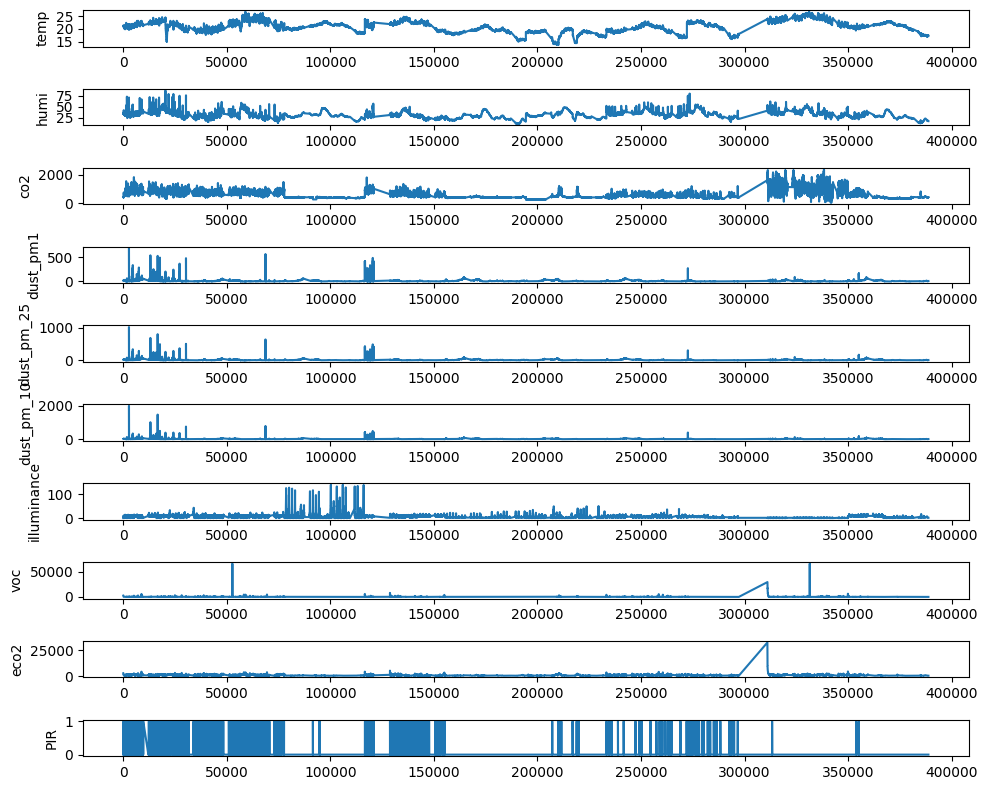

In [21]:
# CSV 파일 불러오기
data = pd.read_csv('/content/drive/MyDrive/경진대회 DATA/train_data.csv', encoding='cp1252')

# 열 선택
selected_columns = data[['temp', 'humi', 'co2', 'dust_pm1', 'dust_pm_25', 'dust_pm_10', 'illuminance', 'voc', 'eco2', 'PIR']]

# NaN 값 제거
selected_columns_without_na = selected_columns.dropna()

# 데이터 분포 시각화
fig, axes = plt.subplots(nrows=len(selected_columns_without_na.columns), figsize=(10, 8))

for i, col in enumerate(selected_columns_without_na.columns):
    axes[i].plot(selected_columns_without_na[col])
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# 통계 추출

In [25]:
data = pd.read_csv('/content/drive/MyDrive/경진대회 DATA/train_data.csv', encoding='cp1252')


data_without_na = data.dropna()

data1=data_without_na.drop('regdate',axis=1)

data1.describe()

,temp,humi,co2,dust_pm1,dust_pm_25,dust_pm_10,illuminance,voc,eco2,PIR,Àç½ÇÀÎ¿ø
count,310742.000000,310742.000000,310742.000000,310742.000000,310742.000000,310742.000000,310742.000000,310742.000000,310742.000000,310742.000000,310742.000000
mean,20.757307,30.857824,586.669015,10.948140,10.995659,11.210609,5.144972,89.782559,783.302730,0.015608,1.355024
std,2.226715,7.615024,294.935140,13.422065,14.093014,16.173044,7.577990,524.517544,492.308951,0.123953,1.448332
min,13.700000,11.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,0.000000,0.000000
25%,19.200000,26.000000,395.000000,3.000000,3.000000,3.000000,1.000000,11.000000,477.000000,0.000000,0.000000
50%,20.900000,30.000000,477.000000,6.000000,6.000000,6.000000,4.000000,36.000000,637.000000,0.000000,1.000000
75%,22.300000,35.000000,697.000000,14.000000,14.000000,14.000000,8.000000,82.000000,940.000000,0.000000,3.000000
max,26.800000,87.000000,2365.000000,690.000000,1020.000000,1983.000000,139.000000,65535.000000,32768.000000,1.000000,6.000000
